In [2]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [3]:
import pandas as pd

data_path = '../data-science-london-scikit-learn/'

train = pd.read_csv(data_path + 'train.csv' )
test = pd.read_csv(data_path + 'test.csv')
trainiLabels = pd.read_csv(data_path + 'trainLabels.csv')

In [4]:
train

,0.29940251144353242,-1.2266241875260637,1.4984250500215328,-1.1761503610375272,5.2898525545597037,0.20829711393323402,2.4044983672405826,1.5945062220589785,-0.051608163273514231,0.66323431039687908,...,-0.85046544625016463,-0.62298999638261954,-1.8330573433160038,0.29302438506869571,3.5526813410266507,0.71761099417552265,3.3059719748508889,-2.7155588147154619,-2.6824085866346223,0.10105047232890663
0,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
1,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
2,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
3,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332
4,-0.773247,-0.123227,0.047423,-0.210266,10.377793,0.526604,-2.751616,0.315541,0.608603,-0.043421,...,-1.487714,0.792790,-0.540711,0.114115,-0.277477,-0.896411,-2.805207,0.469162,3.614157,0.081689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-0.310429,0.826811,-0.952245,0.768850,1.877520,1.320646,1.944609,1.191420,-0.127724,0.070937,...,-0.600411,-0.383792,0.745596,-0.698598,-2.729937,-0.431535,0.372873,1.019092,-2.672811,-0.295141
995,-1.853879,0.246726,0.459921,-2.074267,7.599220,-0.138355,-4.501900,0.630634,-1.590533,-1.112949,...,0.361736,0.240052,-0.856196,-0.072481,-2.935896,0.582411,-2.613407,0.036687,2.809310,4.412567
996,0.912748,-1.734039,-1.047035,0.217573,13.457812,0.162771,-2.250521,2.216161,-0.378326,0.642114,...,1.195896,-1.073806,-2.754369,1.814864,-4.190105,-1.116441,-2.100125,0.061513,0.895536,0.813686
997,2.439780,-0.735511,-0.902426,1.365036,-10.430299,-0.856859,2.686474,0.292035,0.585388,-0.876965,...,2.262326,-0.039488,0.773876,-0.916066,2.604827,-0.649874,-3.423674,0.229748,-2.311088,-3.422217


In [5]:
test

,2.8089094884322816,-0.2428941541280098,-0.54642134078742799,0.25516185655651813,1.7497359401586778,-0.030457614747139938,-1.3220705648016891,3.5780706827705329,-0.66757846469285065,-0.88425685382194696,...,-0.26168811207868709,-0.22437538915802702,-1.6756055243798111,-0.47958360985977283,-0.24438814509352236,-0.67235457360991246,0.51786002310577695,0.010664676497809677,-0.41921432660528302,2.8183870993565581
0,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
1,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
2,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
3,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213
4,-0.424627,1.536196,-1.037752,-0.156466,-2.945038,-0.471607,3.494966,-2.763629,0.819540,0.209529,...,-0.727066,-0.809620,4.504230,-0.481077,-2.923646,-0.468034,-0.846214,1.197350,-5.615563,2.049134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,0.171644,-0.806952,-2.045671,0.021156,2.258491,0.429469,0.857187,0.972600,1.707492,1.676370,...,-1.366312,0.276543,-0.732764,0.243930,-1.151233,-0.274298,0.573013,1.109814,-1.905965,1.457601
8995,1.168564,-0.911253,1.685492,0.867183,3.606170,-0.673875,-1.889365,0.411385,-0.206817,-0.705771,...,0.557757,0.379841,-1.474198,-0.322943,1.964519,0.122384,0.678023,2.024129,0.386542,1.104493
8996,0.052274,-1.736558,-0.263699,-0.219329,8.918393,-1.258320,-3.361146,0.893366,-0.631669,1.887286,...,2.117847,-1.050824,0.182872,0.242725,0.670161,0.112752,-3.006949,1.179606,1.156340,-1.218561
8997,1.443659,0.651892,0.550724,-1.146664,2.621641,-0.867143,0.312742,1.078004,-1.212524,-0.028143,...,0.631480,1.186236,-1.098508,1.159658,-1.957241,0.482533,3.777669,-0.424954,1.333374,2.325271


In [6]:
trainiLabels

,1
0,0
1,0
2,1
3,0
4,1
...,...
994,0
995,1
996,1
997,0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   0.29940251144353242    999 non-null    float64
 1   -1.2266241875260637    999 non-null    float64
 2   1.4984250500215328     999 non-null    float64
 3   -1.1761503610375272    999 non-null    float64
 4   5.2898525545597037     999 non-null    float64
 5   0.20829711393323402    999 non-null    float64
 6   2.4044983672405826     999 non-null    float64
 7   1.5945062220589785     999 non-null    float64
 8   -0.051608163273514231  999 non-null    float64
 9   0.66323431039687908    999 non-null    float64
 10  -1.4083700642531511    999 non-null    float64
 11  1.1147436351160869     999 non-null    float64
 12  0.91041530967390116    999 non-null    float64
 13  2.2181103179158135     999 non-null    float64
 14  4.3056427290235391     999 non-null    float64
 15  0.0889

In [18]:
train.describe()

,0.29940251144353242,-1.2266241875260637,1.4984250500215328,-1.1761503610375272,5.2898525545597037,0.20829711393323402,2.4044983672405826,1.5945062220589785,-0.051608163273514231,0.66323431039687908,...,-0.85046544625016463,-0.62298999638261954,-1.8330573433160038,0.29302438506869571,3.5526813410266507,0.71761099417552265,3.3059719748508889,-2.7155588147154619,-2.6824085866346223,0.10105047232890663
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.025322,-0.023323,-0.025612,-0.001096,1.088127,-0.006465,0.495433,-0.039517,0.026469,-0.004264,...,0.031533,0.023598,-0.541199,-0.011913,-0.487548,0.032686,0.564443,0.009574,-0.890867,0.609960
std,1.008750,1.016094,0.978412,0.970349,4.539161,0.989601,2.119020,2.232776,1.001562,1.013808,...,1.011767,1.001668,2.240688,1.022922,2.118491,1.007316,2.227304,0.994404,2.022240,2.046400
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.670358,-0.690859,-0.700048,-0.616548,-1.805683,-0.733114,-0.839542,-1.607010,-0.680114,-0.682246,...,-0.659295,-0.696257,-2.123069,-0.664966,-1.880040,-0.643513,-1.060154,-0.689890,-2.214672,-0.565156
50%,0.023121,-0.031181,0.008037,0.003735,0.858932,0.025803,0.571475,0.017761,0.022855,-0.037531,...,0.049792,0.050187,-0.568168,-0.028179,-0.493701,0.036975,0.453544,0.038464,-0.853259,0.780175
75%,0.762980,0.683464,0.657948,0.640968,3.836911,0.671494,1.912284,1.436715,0.741949,0.666416,...,0.747815,0.700093,0.940334,0.651692,0.997741,0.690139,2.120006,0.693603,0.390982,1.994308
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


## EDA

C:\Users\andyp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


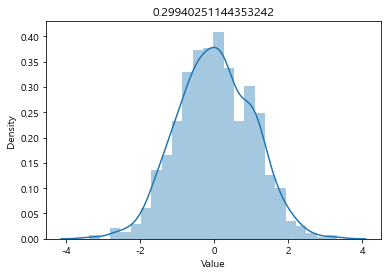

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 첫 번째 열에 대한 분포 확인
sns.distplot(train.iloc[:, 0], kde=True, rug=False)

plt.title(train.columns[0])
plt.xlabel("Value")
plt.ylabel("Density")

plt.show()


C:\Users\andyp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\andyp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\andyp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

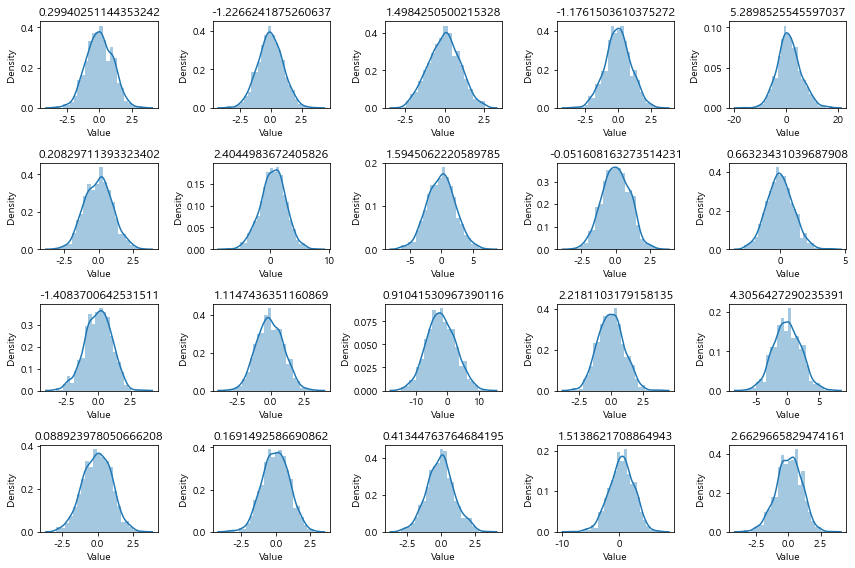

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# subplot 설정
fig, axes = plt.subplots(4, 5, figsize=(12, 8))

# 첫 번째 열부터 여섯 번째 열까지 순회하면서 그래프 그리기
for i, ax in enumerate(axes.flatten()):
    if i < train.shape[1]:
        sns.distplot(train.iloc[:, i], kde=True, rug=False, ax=ax)
        ax.set_title(train.columns[i])
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")
    else:
        # 마지막 subplot은 사용하지 않는 공간으로 설정
        ax.axis("off")

# subplot 간 간격 조정
plt.tight_layout()

plt.show()


C:\Users\andyp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\andyp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\andyp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

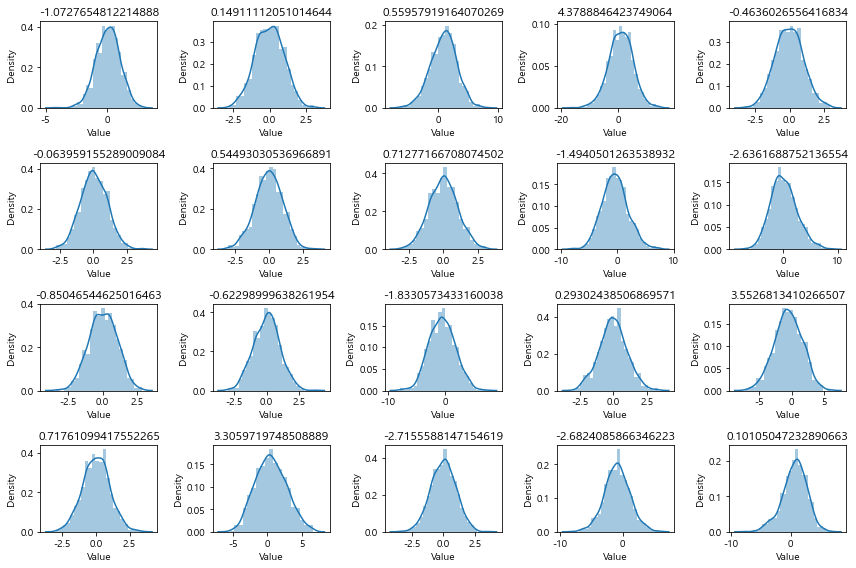

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# subplot 설정
fig, axes = plt.subplots(4, 5, figsize=(12, 8))

# 첫 번째 열부터 여섯 번째 열까지 순회하면서 그래프 그리기
for i, ax in enumerate(axes.flatten()):
    k = i+20
    if k < train.shape[1]:
        sns.distplot(train.iloc[:, k], kde=True, rug=False, ax=ax)
        ax.set_title(train.columns[k])
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")
    else:
        # 마지막 subplot은 사용하지 않는 공간으로 설정
        ax.axis("off")

# subplot 간 간격 조정
plt.tight_layout()

plt.show()


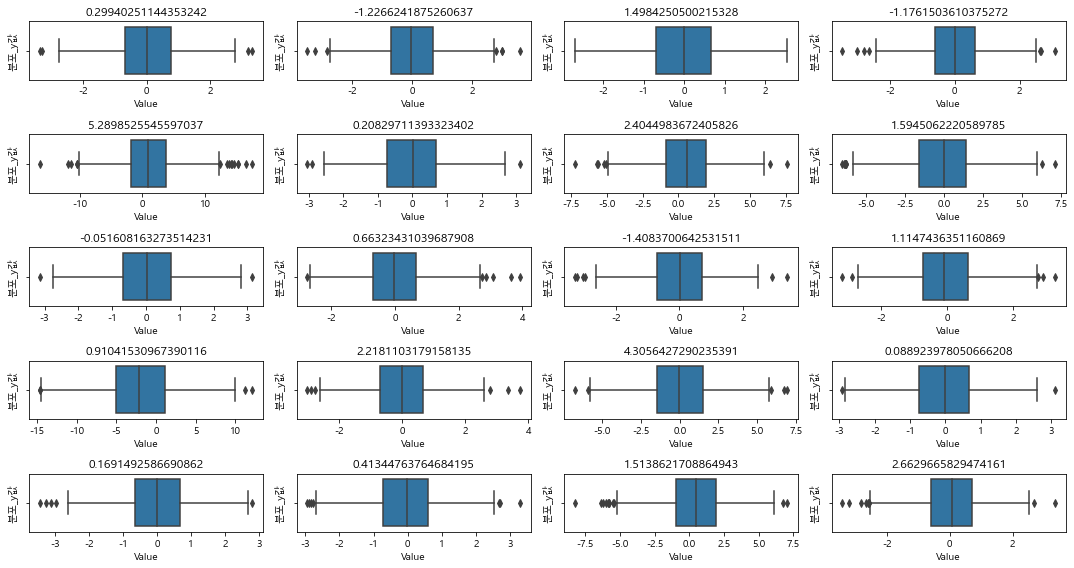

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

# subplot 설정
fig, axes = plt.subplots(5, 4, figsize=(15, 8))

# 첫 번째 열부터 여섯 번째 열까지 순회하면서 그래프 그리기
for i, ax in enumerate(axes.flatten()):
    k = i
    if k < train.shape[1]:
        sns.boxplot(x=train.iloc[:, k], ax=ax)  # 박스플롯 그리기
        ax.set_title(train.columns[k]) # 서브플롯 제목 설정
        ax.set_xlabel("Value")
        ax.set_ylabel("분포_y값")
    else:
        # 마지막 subplot은 사용하지 않는 공간으로 설정
        ax.axis("off")

# subplot 간 간격 조정
plt.tight_layout()

plt.show()


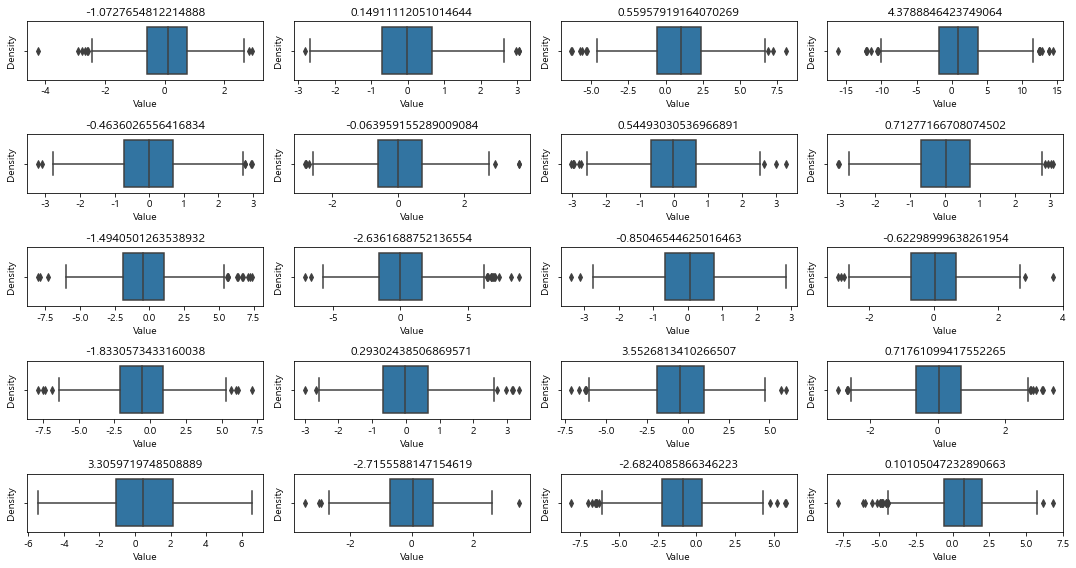

In [24]:

import seaborn as sns
import matplotlib.pyplot as plt

# subplot 설정
fig, axes = plt.subplots(5, 4, figsize=(15, 8))

# 첫 번째 열부터 여섯 번째 열까지 순회하면서 그래프 그리기
for i, ax in enumerate(axes.flatten()):
    k = i+20
    if k < train.shape[1]:
        sns.boxplot(x=train.iloc[:, k], ax=ax)  # 박스플롯 그리기
        ax.set_title(train.columns[k]) # 서브플롯 제목 설정
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")
    else:
        # 마지막 subplot은 사용하지 않는 공간으로 설정
        ax.axis("off")

# subplot 간 간격 조정
plt.tight_layout()

plt.show()


## XGBclassifier

In [33]:
%%time

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# 데이터 로드 및 전처리
X = train  # 특성 데이터
# y = ...  # y값이 없는 경우

# 군집화 수행
kmeans = KMeans(n_clusters=2 , n_init=10)
labels = kmeans.fit_predict(X)

# 레이블 할당
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# XGBoost 분류 모델 학습
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# 모델 평가
accuracy = xgb_model.score(X_test, y_test)
print("Accuracy:", accuracy)


AttributeError: 'NoneType' object has no attribute 'split'

In [31]:
import pandas as pd

# train 데이터프레임에서 None 값을 포함하는 열 확인
columns_with_none = []
for col in train.columns:
    if train[col].isnull().any():
        columns_with_none.append(col)

# 결과 출력
print("Columns with None values:")
print(columns_with_none)


Columns with None values:
[]
